In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import pandas as pd
from numpy import cos,sin,pi,tan,log,exp,sqrt,array,linspace,arange
from mpl_toolkits import mplot3d
from ipykernel.pylab.backend_inline import flush_figures
%matplotlib inline

plt.rcParams['figure.figsize'] = [8.0, 8.0]

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

# plt.rcParams.update({
#     "text.usetex": True,
# #     "font.family": "serif",
# })

In [19]:
%%html
<style>
tr {
    font-size: 1.5em;
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

## One(-or-so)-minute Review

  - Distance between points in $\RR^n = \{(x_1, \dots,x_n): x_i \in \RR\}$ is measured by $$\sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$
  - A vector $\vec v$ is a directed line segment modulo location. 
  - It can be specified by the displacement in each coordinate. 
  $$\vec v = \langle v_1, v_2, v_3 \rangle $$
  - The **length** of a vector is (in $\RR^3$), the scalar
   $$|\vec v| = \sqrt{v_1^2+ v_2^2 + v_3^2}$$
  - Thus the distance between points with position vectors $\vec v $ and $\vec w$ is simply $|\vec v - \vec w|$.


<div style="padding-bottom: 40%"></div>

## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| magnitude    | $|\vec v|$ | $$\sqrt{\sum v_i^2}$$ | scalar |
| scalar multiplication | $c \vec v$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $\vec v + \vec w$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |

<div style="padding-bottom: 40%"></div>

## Linear Combinations

A *linear combination* of vectors $\vec v$ and $\vec w$ is the expression $$a \vec v + b \vec w$$ where $a$ and $b$ are scalars.

In [20]:
@interact
def _(a=(-2.0,2.0),b=(-2.0,2.0)):
    fig,ax = plt.subplots(1, figsize=(8,8))

    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    ax.arrow(0,0,2,1,color='r',width=.02,head_width=.1,lw=4)
    ax.arrow(0,0,-1/2,3/2,color='b',width=.02,head_width=.1,lw=4)
    ax.arrow(0,0,2*a,a,alpha = .3)
    ax.arrow(0,0,-b/2,b*3/2,alpha=.3)
    ax.arrow(0,0,2*a - b/2,a + b*3/2,color='purple', width=.02,head_width=.1,lw=4)
    ax.grid(True)
    flush_figures()

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<div style="padding-bottom: 40%"></div>

### Special Case: Convex combinations

Consider a linear combination $c\vec v + d\vec w$ such that $c+d=1$. Which vectors result?

In [21]:

    
@interact
def _(t=(-2.0,2.0,.1)):
    fig,ax = plt.subplots(1, figsize=(8,8))

    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    ax.arrow(0,0,2,1,color='r',width=.02,head_width=.1,lw=4)
    ax.arrow(0,0,-1/2,3/2,color='b',width=.02,head_width=.1,lw=4)
    ax.arrow(0,0,2*t,t,alpha = .3)
    ax.arrow(0,0,-(1-t)/2,(1-t)*3/2,alpha=.3)
    ax.arrow(0,0,2*t - (1-t)/2,t + (1-t)*3/2,color='purple', width=.02,head_width=.1,lw=4)
    ax.grid(True)
    flush_figures()
    

interactive(children=(FloatSlider(value=0.0, description='t', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

We can see they form a line throw $\vec v$ and $\vec w$ by noting $d=1-c$, and thus,
$$c\vec v + d\vec w = c\vec v +(1-c)\vec w = \vec w + c(\vec v-\vec w)$$
so every such vector "starts" at $\vec w$ and moves some multiple of the direction toward $\vec v$.

<p style="padding-bottom:40%;"> </p>

# Special Basis Vectors

In $\RR^3$, since we use them so often, we define special basis vectors 
$$\vec i = \bv{1 \\ 0 \\ 0} \qquad \vec j = \bv{0 \\ 1  \\ 0} \qquad \vec k = \bv{0 \\ 0 \\ 1 }$$

Then every vector is an obvious linear combination of these. 
$$\langle a, b, c \rangle = a\,\vec i + b\,\vec j + c\,\vec k$$

<p style="padding-bottom:40%;"> </p>

# Lecture 02

Objectives:
  - Dot product
    - definition
    - algebraic and geometric views
  - Cross product
    - definition
    - mnemonic
    - key properties
 
 References:
   - Openstax (Strang et al)
     - [§1.3 The Dot Product](https://openstax.org/books/calculus-volume-3/pages/2-3-the-dot-product) 
     - [§1.4 The Cross Product](https://openstax.org/books/calculus-volume-3/pages/2-4-the-cross-product)

<p style="padding-bottom:40%;"> </p>

## The Dot Product

We expand our list of vector operations with the **dot** (or **inner** or **scalar**) **product**.

$$\vec v \cdot \vec w = \sum_{i=1}^n v_i w_i$$

#### Examples

  - $\langle 4,2, -1 \rangle \cdot \langle -2,6, 0 \rangle = -8 + 12 + 0 = 4 $

  - Compare: $$\begin{bmatrix} 4 \\ 2 \\ -1 \end{bmatrix}\cdot \begin{bmatrix} 2 \\ 6 \\ 0 \end{bmatrix} = -8 + 12 = 4 $$

  - $\vec i \cdot \vec i = 1$

  - $\vec i \cdot \vec j = \vec i \cdot \vec k = \vec j \cdot \vec k = 0$

### 

<p style="padding-bottom:40%;"> </p>

## Properties of the dot product. 

  - $\vec v \cdot \vec v = |\vec v |^2 = v_1^2 + v_2^2 + \ldots$

  - $\vec v \cdot \vec 0 = 0$

  - $\vec v \cdot \vec w = \vec w \cdot \vec v$

  - $(c\vec u + d\vec v) \cdot \vec w = c(\vec u \cdot \vec w) + d (\vec v \cdot \vec w)$

<p style="padding-bottom:40%;"> </p>

### Exercise

In [22]:
display(HTML("""
<iframe src="https://embed.polleverywhere.com/multiple_choice_polls/m8rI2GBEJASfzT4uT3S8v?controls=none&short_poll=true" width="800px" height="600px"></iframe>
"""))

## Dot products and angles

In [23]:
@interact(al=(0.,2.0*pi,pi/60),th=(0.,2.*pi,pi/60))
def _(al=pi/6,th=pi/3*2):
    fig,ax = plt.subplots(1, figsize=(8,8))

    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    ax.quiver(0,0,3/sqrt(2)*cos(al),
             3/sqrt(2)*sin(al),color='r',angles='xy', scale_units='xy', scale=1)
    ax.quiver(0,0,sqrt(2)*cos(th+al),
             sqrt(2)*sin(th+al),color='b',
             angles='xy', scale_units='xy', scale=1)
#     ax.arrow(0,0,2*t,t,alpha = .3)
#     ax.arrow(0,0,-(1-t)/2,(1-t)*3/2,alpha=.3)
#     ax.arrow(0,0,2*t - (1-t)/2,t + (1-t)*3/2,color='purple', width=.02,head_width=.1)
    ax.grid(True)
    ax.text(0,3.5,f"$\\vec v\\cdot\\vec w = {3*cos(th):.4f}$",fontsize=22)
    t = linspace(0,1,100)
    ax.plot(cos(al + t*th)/2, sin(al + t*th)/2,zorder=-1)
    if th > 0:
        ax.text(cos(th/2 + al),sin(th/2 + al),f"$\\theta$",fontsize=22, ha='center', va='center')
    ax.plot(cos(al*t)/3*2, sin(al*t)/3*2,zorder=-1)
    if al > 0:
        ax.text(cos(al/2),sin(al/2),f"$\\alpha$",fontsize=22, ha='center', va='center')
    flush_figures()

interactive(children=(FloatSlider(value=0.5235987755982988, description='al', max=6.283185307179586, step=0.05…

<p style="padding-bottom:40%;"> </p>

## Geometric View

The following formula best summarizes the significance of the dot product. 

$$\vec v \cdot \vec w = |\vec v | | \vec w | \cos \theta $$

where $\theta$ is the angle between the vectors. 

This equation holds in any dimension. 

<p style="padding-bottom:40%;"> </p>

#### Definition

Two vectors $\vec v$ and $\vec w$ are **orthogonal** provided $\vec v \cdot \vec w =0$. 

*Perpendicular*, usually for dimesions 2 and 3, is also acceptable.

<p style="padding-bottom:40%;"> </p>


### [Exercise](https://PollEv.com/multiple_choice_polls/XohgLLf7HHGw0swRP3OL1/respond)

What angle does the line $x = y = z$ make with the $xy$-plane?

In [33]:
display(HTML("""
<iframe src="https://pollev-embeds.com/multiple_choice_polls/XohgLLf7HHGw0swRP3OL1/respond" width="800px" height="600px"></iframe>
"""))

<p style="padding-bottom:40%;"> </p>

## Projection

Let $\vec v = \langle 3, 1 \rangle$ and $\vec w = \langle 1,1 \rangle$. Find the scalar $c$ such that $$ |\vec v - c\vec w|$$ is as small as possible.

**Reinterpretation**
> Find the multiple of vector $\vec w $ *closest* to $\vec v$.



In [25]:
@interact(c=(0.,8.,.2))
def _(c=1):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])

    ax.quiver(0,0,5,3,color='r',angles='xy', scale_units='xy', scale=1)
    ax.quiver(0,0,c,c,color='b',angles='xy', scale_units='xy', scale=1)
    # ax.quiver(c,c,5-c,3-c,color='k',alpha = .3,angles='xy', scale_units='xy', scale=1)

    ax.text(2,7,f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-c,3-c])):.4f}$",size=22)
    ax.text(c-1,c,f"${c:.1f}\\vec w$",size=18)
    ax.text(5,3,f"$\\vec v$",size=18)
    flush_figures()

interactive(children=(FloatSlider(value=1.0, description='c', max=8.0, step=0.2), Output()), _dom_classes=('wi…

<p style="padding-bottom:40%;"> </p>

In [26]:
@interact(c=(0.,8.,.2))
def _(c=1):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])

    ax.quiver(0,0,5,3,color='r',angles='xy', scale_units='xy', scale=1)
    ax.quiver(0,0,c,c,color='b',angles='xy', scale_units='xy', scale=1)
    ax.quiver(c,c,5-c,3-c,color='k',alpha = .3,angles='xy', scale_units='xy', scale=1)
    ax.plot([0,8],[0,8],'--')

    ax.text(2,7,f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-c,3-c])):.4f}$",size=22)
    ax.text(c-1,c,f"${c:.1f}\\vec w$",size=18)
    ax.text(5,3,f"$\\vec v$",size=18)
    flush_figures()

interactive(children=(FloatSlider(value=1.0, description='c', max=8.0, step=0.2), Output()), _dom_classes=('wi…

<p style="padding-bottom:40%;"> </p>

### Definitions

Suppose $\vec b \neq \vec 0$.

The **vector projection** ( or _component_) of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{proj}_\vec b \vec a = \frac{\vec a \cdot \vec b}{\vec b \cdot \vec b} \vec b. $$

The **scalar projection** of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{comp}_\vec b \vec a = \frac{\vec a \cdot \vec b}{|\vec b|}. $$


Note: The notation for the latter comes from the "*comp*onent of $\vec a$ in the $\vec b$ direction."

Furthermore, let $\vec u = \frac{\vec b}{|\vec b|}$, the normalization of $\vec b$. Then,

$$\operatorname{proj}_\vec b \vec a = (\operatorname{comp}_\vec b \vec a)\vec u = (\vec a \cdot \vec u)  \vec u.$$

<p style="padding-bottom:40%;"> </p>

### [Exercises](https://pollev.com/dcy2)

In [27]:
display(HTML("""
<iframe src="https://embed.polleverywhere.com/multiple_choice_polls/wsaqPHN8xerNCVtEpW0r2?controls=none&short_poll=true" width="800px" height="600px"></iframe>
"""))

In [28]:
display(HTML("""
<iframe src="https://embed.polleverywhere.com/multiple_choice_polls/xm3Wne3aZE7oNXH0uRFXH?controls=none&short_poll=true" width="800px" height="600px"></iframe>
"""))

<div style="padding-bottom: 40%"></div>

### Exercise 

The (infinitely long) finish line to a boat race is modeled by $3x + 4y = 12$. Boat $A$ is at position $(3/2, 0)$ and boat $B$ is at $(-1, 1)$. Which is winning?

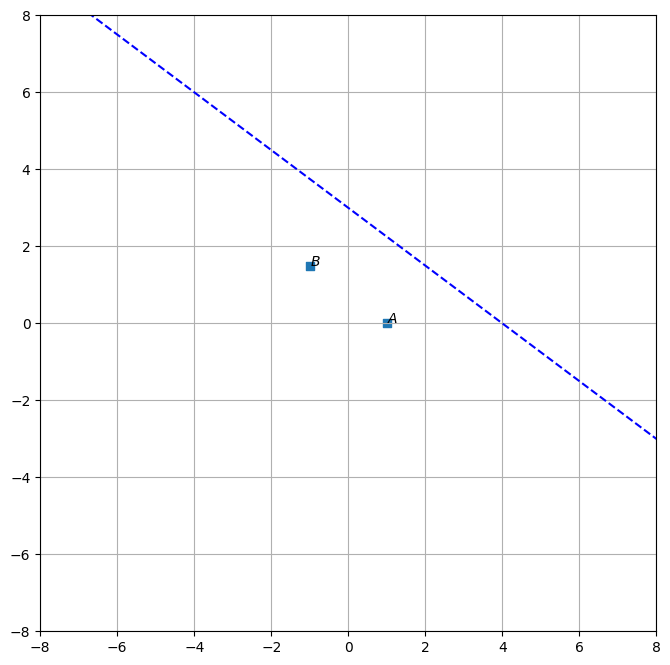

In [29]:
plt.figure(figsize=(8,8))
plt.plot([-8,10],[9,-18/4],'b',linestyle='dashed')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.text(1,0,'$A$')
plt.text(-1,3/2,'$B$')
plt.scatter([1,-1],[0,3/2],marker='s');

<p style="padding-bottom:40%;"> </p>

# Cross Product

It turns out $\RR^3$ is special. There happens to be a vector 'multiplication' of two vectors $$\vec v \times \vec w$$ that gives a new vector. This **does not work** in $\RR^2$ (and most other dimensions).

The following properties actually define the cross product.

  - $\vec v \times \vec w$ is bilinear. 

  - $\vec v \times \vec w  = - \vec w \times \vec v $ (antisymmetry)

  - $\vec i \times \vec j = \vec k$
  - $\vec j \times \vec k = \vec i$
  - $\vec k \times \vec i = \vec j$
  

<p style="padding-bottom:40%;"> </p>

## Formula

$$ \langle a,b,c \rangle\times \langle d,e,f \rangle = (a\vec i + b\vec j + c \vec k)\times(d\vec i + e\vec j + f \vec k)$$

$$ = \begin{vmatrix} \vec i & \vec j & \vec k \\a &b &c \\ d & e & f \\ \end{vmatrix} $$

<p style="padding-bottom:40%;"> </p>

## Properties of $\vec v \times \vec w$

  - $\vec v \times \vec w$ is perpendicular to *both* $\vec v $ and $\vec w$.

  - $\vec v \times \vec w$ points in the direction according to the right-hand-rule.

  - $|\vec v \times \vec w| = |\vec v ||\vec w|\sin\theta$ where theta is the (positive) angle between the vectors.

In [30]:
@interact
def _(t=(0.,np.pi),angle=(-12,108,6)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    ax.view_init(30,angle)
    v= np.array((1,1,0))
    w =np.array((1-t,-1/2 + t,1))
    u = np.cross(w,v)
    for c in 'xyz':
        getattr(ax,f"set_{c}label")(f"${c}$",fontsize=16)
        getattr(ax,f"set_{c}lim")([0,2])
    origin = [0,0,0]
    X, Y, Z = zip(origin,origin,origin) 
    U, V, W = zip(u,v,w)
    ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.1)
    flush_figures()

interactive(children=(FloatSlider(value=1.5707963267948966, description='t', max=3.141592653589793), IntSlider…

<p style="padding-bottom:40%;"> </p>

### Exercises

  1. Find a unit vector perpendicular to $\langle 1,2,-1\rangle$ and $\langle 3,0,1\rangle$. Is there only one?
  

  2. Suppose that $\vec a$ is a nonzero vector in $\RR^3$.
  
    1. If $\vec a \cdot \vec b = \vec a \cdot \vec c$, does it follow that $\vec b = \vec c$?
    
    1. If $\vec a \times \vec b= \vec a \times \vec c$, does it follow that $\vec b = \vec c$?
    
    2. If both conditions above hold, does it follow that $\vec b = \vec c$?

<p style="padding-bottom:40%;"> </p>

# Areas & Volumes

We won't need this immediately, but put it in the back of your mind as it will come back later. 

Let $\vec a$ and $\vec b$ define the nonparallel edges of a parallelogram. 

In [31]:
@interact(c=(0.,3.5,.1))
def _(c=1):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])
    
    ax.quiver(0,0,4,1,color='r',angles='xy', scale_units='xy', scale=1)
    ax.quiver(0,0,c,2*c,color='b',angles='xy', scale_units='xy', scale=1)
    ax.quiver(c,2*c,4,1,color='r',angles='xy', scale_units='xy', scale=1)
    ax.quiver(4,1,c,2*c,color='b',angles='xy', scale_units='xy', scale=1)
    ax.fill([0,4,4+c,c],[0,1,2*c + 1,2*c],alpha=.5)
    ax.plot([c,c*3/8*4,0],[2*c,c*3/8,0],'--')

    ax.text(c*5/4,c*19/16,"h",size=18)

    flush_figures()

interactive(children=(FloatSlider(value=1.0, description='c', max=3.5), Output()), _dom_classes=('widget-inter…

Then the height $h = $

and the area $A = $

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>